<a href="https://colab.research.google.com/github/ValentineKarimi/Carrefour-Kenya-Analysis-/blob/main/Anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("tibbletime")
install.packages("anomalize")
library(tidyverse)
library(tibbletime)
library(anomalize)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘tibbletime’


The following object is masked from ‘package:stats’:

    filter


══ Use anomalize to improve your Forecasts by 50%! ═════════════════════════════
Business Science offers a 1-hour course - Lab #18: Time Series Anomaly Detection!
</> Learn more at: https://university.business-science.io/p/learning-labs-pro </>



In [2]:
#Read the dataset 
anomaly <- read_csv("http://bit.ly/CarreFourSalesDataset")
head(anomaly)


── Column specification ────────────────────────────────────────────────────────
cols(
  Date = col_character(),
  Sales = col_double()
)




Date,Sales
<chr>,<dbl>
1/5/2019,548.9715
3/8/2019,80.2200
3/3/2019,340.5255
1/27/2019,489.0480
2/8/2019,634.3785
3/25/2019,627.6165


In [3]:
#Check the datatype

sapply(anomaly,class)


Date       Sales 
"character"   "numeric"

In [4]:
#Check missing values 
colSums(is.na(anomaly)) 

Date Sales 
    0     0

In [5]:
#Display the internal structure 
str(anomaly)


tibble [1,000 × 2] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Date : chr [1:1000] "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Sales: num [1:1000] 549 80.2 340.5 489 634.4 ...
 - attr(*, "spec")=
  .. cols(
  ..   Date = col_character(),
  ..   Sales = col_double()
  .. )


In [6]:

#getting the frequency
frequency <- as.data.frame(table(anomaly$Date))

In [8]:

head(frequency)

,Var1,Freq
,<fct>,<int>
1,1/1/2019,12
2,1/10/2019,9
3,1/11/2019,8
4,1/12/2019,11
5,1/13/2019,10
6,1/14/2019,13


In [9]:
# convert column to date class
frequency$Var1 <- as.Date(frequency$Var1)

In [10]:
#Change datatype of varibale var1 to tbl_time for easier anomaly detection 

frequency1<- as_tbl_time(frequency, Var1)

In [11]:
head(frequency1)

Var1,Freq
<date>,<int>
1-01-20,12
1-10-20,9
1-11-20,8
1-12-20,11
NA,10
NA,13


In [12]:
#Check for missing values 
print(colSums(is.na(frequency1)))


Var1 Freq 
  53    0 


In [13]:
#Remove missing data 
newdata <- na.omit(frequency1)

In [14]:
#Confirm missing data is removed
print(colSums(is.na(newdata)))

Var1 Freq 
   0    0 


time_decompose(): Separates the time series into seasonal, trend, and remainder components


anomalize(): Applies anomaly detection methods to the remainder component.


time_recompose(): Calculates limits that separate the “normal” data from the anomalies!

In [15]:
newdata_anomalized <- newdata %>%
    time_decompose(Freq, merge = TRUE) %>%
    anomalize(remainder) %>%
    time_recompose()

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

frequency = 12 months

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

trend = 12 months

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [16]:
# see  how anomaly occured 
newdata_anomalized %>% glimpse()

Rows: 36
Columns: 11
$ Var1          <date> 1-01-20, 1-02-20, 1-03-20, 1-04-20, 1-05-20, 1-06-20, …
$ Freq          <int> 12, 8, 8, 6, 12, 9, 9, 18, 8, 9, 8, 11, 6, 14, 14, 11, …
$ observed      <dbl> 12, 9, 8, 11, 8, 8, 6, 12, 9, 9, 18, 8, 6, 11, 8, 8, 14…
$ season        <dbl> -1.65298855, -0.22495736, -1.85490548, -0.61548453, 2.7…
$ trend         <dbl> 11.141894, 10.622076, 10.102257, 9.661878, 9.221499, 8.…
$ remainder     <dbl> 2.51109430, -1.39711816, -0.24735131, 1.95360649, -4.00…
$ remainder_l1  <dbl> -9.85197, -9.85197, -9.85197, -9.85197, -9.85197, -9.85…
$ remainder_l2  <dbl> 10.01754, 10.01754, 10.01754, 10.01754, 10.01754, 10.01…
$ anomaly       <chr> "No", "No", "No", "No", "No", "No", "No", "No", "No", "…
$ recomposed_l1 <dbl> -0.36306398, 0.54514849, -1.60461836, -0.80557617, 2.15…
$ recomposed_l2 <dbl> 19.50645, 20.41466, 18.26490, 19.06394, 22.02085, 19.96…


Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

frequency = 12 months

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

trend = 12 months



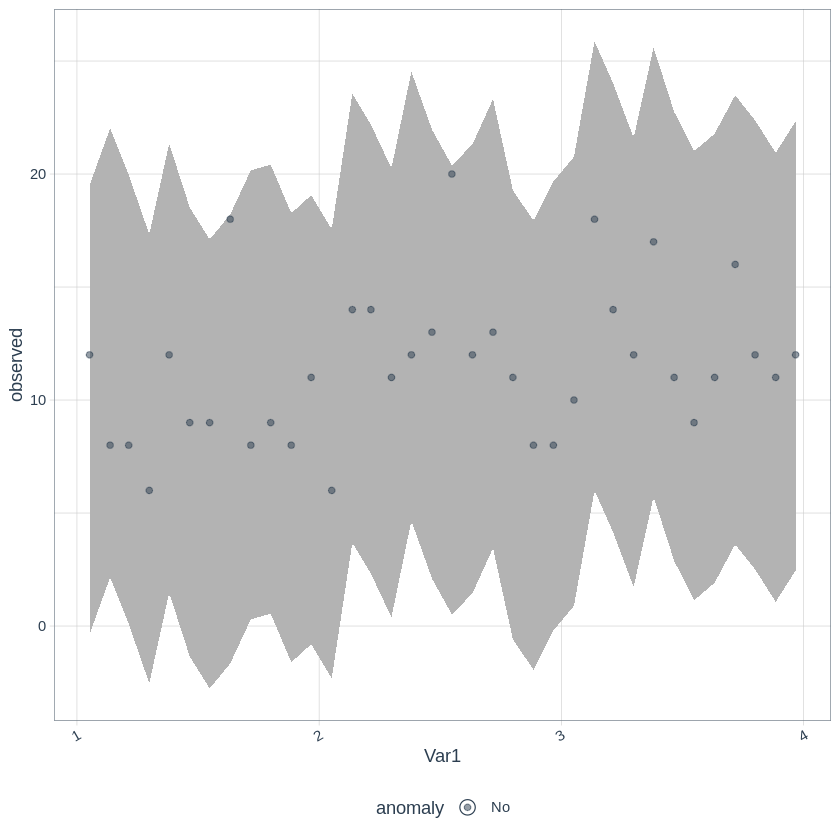

In [18]:
#Plotting
newdata %>%
    time_decompose(Freq) %>%
    anomalize(remainder) %>%
    time_recompose() %>%
    plot_anomalies(time_recomposed = TRUE, ncol = 3, alpha_dots = 0.5)

No anomaly detected 